In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from library.sb_utils import save_file
# scipi is a library for statistical tests and visualizations 
from scipy import stats
from scipy.stats.mstats import winsorize
# random enables us to generate random numbers
import random
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [5]:
df = pd.read_csv('../data/df_cleaned.csv')
df.head()

,track_name,artist(s)_name,released_year,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,bpm,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
0,WHERE SHE GOES,Bad Bunny,2023,3133,303236322,84,87,144,65,23,80,14,11,6
1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023,3090,725980112,34,43,148,67,83,76,48,8,3
2,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2023,2953,553634067,49,66,170,81,56,48,21,8,33
3,un x100to,"Bad Bunny, Grupo Frontera",2023,2876,505671438,41,54,83,57,56,72,23,27,5
4,Flowers,Miley Cyrus,2023,12211,1316855716,300,745,118,71,65,68,6,3,7


In [6]:
X = df[['valence_%']].values
y = df[['danceability_%']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =42)

In [7]:
print(X_train.shape, X_test.shape , y_train.shape , y_test.shape)

(177, 1) (60, 1) (177, 1) (60, 1)


In [8]:
rModel = linear_model.LinearRegression()

In [9]:
rModel.fit(X_train, y_train)

LinearRegression()

In [10]:
print(rModel.score(X_train, y_train))

0.20556438438968205


In [11]:
y_pred = rModel.predict(X_test)

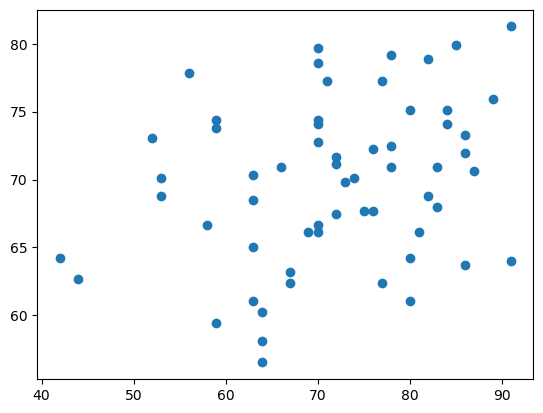

In [12]:
plt.scatter(y_test,y_pred)

In [13]:
X = df[['valence_%']].values
X = sm.add_constant(X)

In [14]:
y = df[['danceability_%']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [15]:
rModel2 = sm.OLS(y_train, X_train)
rModel2_results = rModel2.fit()

In [16]:
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     36.34
Date:                Sat, 27 Jul 2024   Prob (F-statistic):           9.55e-09
Time:                        18:02:36   Log-Likelihood:                -685.52
No. Observations:                 177   AIC:                             1375.
Df Residuals:                     175   BIC:                             1381.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.6680      2.288     24.768      0.000      52.153      61.184
x1             0.2390      0.040      6.029      0.000       0.161       0.317
==============================================================================
Omnibus:                        2.772   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                2.831
Skew:                          -0.289   Prob(JB):                        0.243
Kurtosis:                       2.778   Cond. No.                         150.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#no strong correlations between independent and dependent variables